## eventfulSNAC

An Ipython notebook to explore the effect of different thermal scenarios

In [15]:
# import Diamond and AggregationModel
from snac.diamond import Diamond
from snac.SNACmodel import AggregationModel

### 1) Diamond parameters

In [16]:
# ages in Ma:
age_core = 3520
age_rim = 1860
age_kimberlite = 0

# Nitrogen data (total N concentration in ppm and proportion of B-centres 0-1):
# core:
c_NT = 625
c_agg = 0.863

# rim:
r_NT = 801
r_agg = 0.197

# create Diamond instance
diamond = Diamond(
    age_core=age_core,
    age_rim=age_rim,
    age_kimberlite=age_kimberlite,
    c_NT=c_NT,
    c_agg=c_agg,
    r_NT=r_NT,
    r_agg=r_agg,
    )

print(diamond)

Diamond with
- core age 3520 Ma,
- rim age 1860 Ma,
- kimberlite age 0 Ma.
- Core: [N_T] 625 ppm, 86.3%B.
- Rim: [N_T] 801 ppm, 19.7%B.


### 2) Model parameters

In [17]:
# time step in Myr, e.g. 1 Myr
dt = 1

# first guess for starting temperature (deg.C) and cooling rate (K/Myr):
cooling_rate0 = 0.01
T_start0 = 1200

# boundaries for starting Temperature:
T_bounds = (1000, 1450)

# boundaries for cooling rate:
rate_bounds = (0.001, 0.12)


### 3) Run model and create diagrams

#### 3.1 Temperature pulse

In [18]:
# create aggregation model instance
# Temperature increase during pulse (K)
T_pulse = 50

# Start time of pulse (Myr)
t_pulse_start = 1000

# Duration of pulse (Myr)
pulse_duration = 25

model_hs = AggregationModel(
    diamond=diamond,
    cooling_rate0=cooling_rate0,
    T_start0=T_start0,
    rate_bounds=rate_bounds,
    T_bounds=T_bounds,
    dt=dt,
    T_scenario='hot_spike',
    scenario_params=(T_pulse, t_pulse_start, pulse_duration)
)

# calculate thermal history and nitrogen aggregation
model_hs.run()

print(model_hs)

AggregationModel:
for Diamond with
- core age 3520 Ma,
- rim age 1860 Ma,
- kimberlite age 0 Ma.
- Core: [N_T] 625 ppm, 86.3%B.
- Rim: [N_T] 801 ppm, 19.7%B.

Cooling scenario: hot_spike
- with additional parameters: (50, 1000, 25)
Initial guesses:
- Starting: 1200 deg.C
- Cooling rate: 10.0 K/Gyr

Fitted model results:
- Starting T: 1215.82 deg.C
- Cooling rate: 51.93 K/Gyr


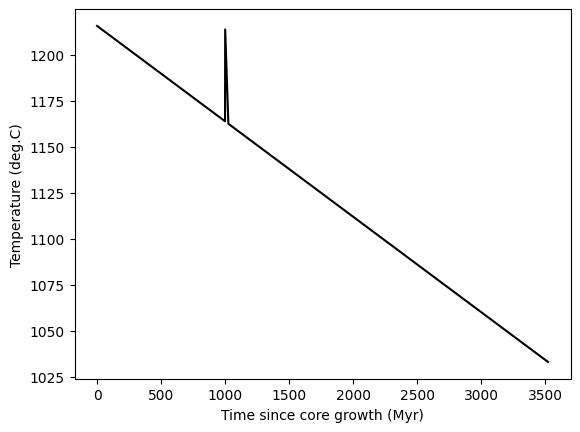

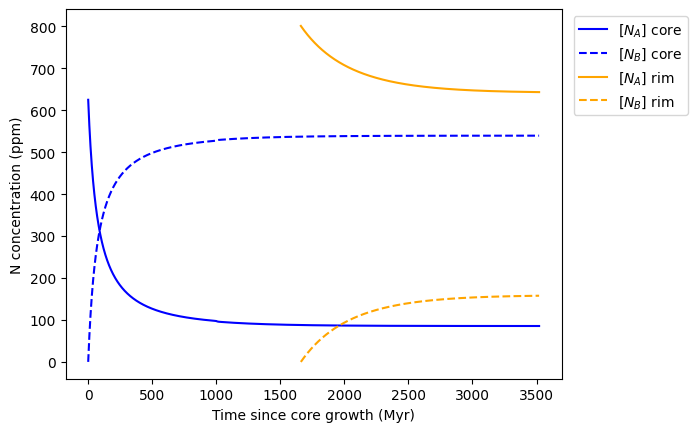

In [19]:
# plot results
model_hs.plot_T_history()
model_hs.plot_aggregation_history(rim_start=True)

#### 3.2 Rapid uplift

In [20]:
# create aggregation model instance
# Temperature drop during uplift (K)
T_drop = 20
 # Start time of ascent (Myr)
t_ascent = 1000

model_ra = AggregationModel(
    diamond=diamond,
    cooling_rate0=cooling_rate0,
    T_start0=T_start0,
    rate_bounds=rate_bounds,
    T_bounds=T_bounds,
    dt=dt,
    T_scenario='rapid_ascent',
    scenario_params=(T_drop, t_ascent)
)

# calculate thermal history and nitrogen aggregation
model_ra.run()

print(model_ra)

AggregationModel:
for Diamond with
- core age 3520 Ma,
- rim age 1860 Ma,
- kimberlite age 0 Ma.
- Core: [N_T] 625 ppm, 86.3%B.
- Rim: [N_T] 801 ppm, 19.7%B.

Cooling scenario: rapid_ascent
- with additional parameters: (20, 1000)
Initial guesses:
- Starting: 1200 deg.C
- Cooling rate: 10.0 K/Gyr

Fitted model results:
- Starting T: 1213.28 deg.C
- Cooling rate: 41.31 K/Gyr


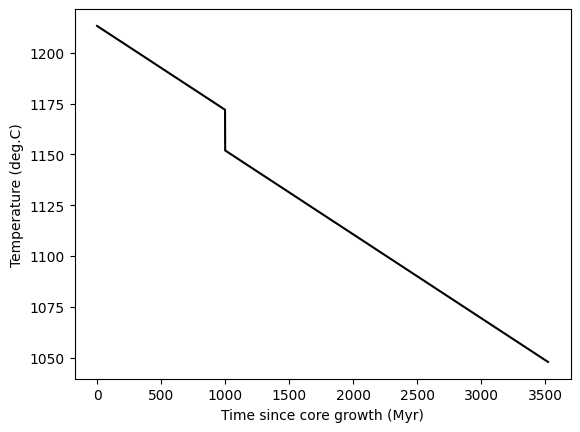

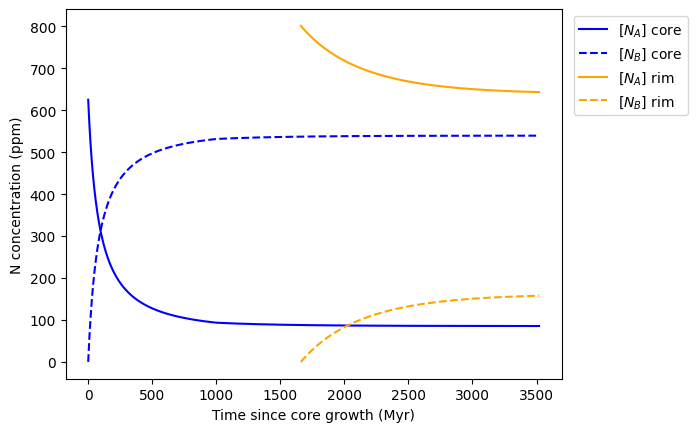

In [21]:
# plot results
model_ra.plot_T_history()
model_ra.plot_aggregation_history(rim_start=True)